<h1>Develop a prediction model</h1>

<p>
    In this project we're using a dataset where the data wrangling and data exploratory has already done, in on another notebook we used.
</p>

In [58]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline

In [5]:
# Download data set
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
file_name="/Data/usedcars.csv"

In [13]:
# Define a download function
def download(filepath, filename):
    try:
        response = requests.get(filepath)
        response.raise_for_status()
        if response.status_code == 200:  
            with open (filename, "wb") as f:
                        f.write(response.content)

    except requests.exceptions.RequestException as e:
        print(f"An error occurred during the request: {e}")
    except IOError:
            print ("Error download and writing")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
    else:
        print('Successfully done')
         

In [14]:
# Download the file
download(file_path,file_name)

Successfully done


In [15]:
# Import cvs in pd
df = pd.read_csv("Data/usedcars.csv")
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2>1. Linear Regression and Multiple Linear Regression</h2>

<h4>Linear Regression</h4>

<b>Simple Linear Regression</b>
<br>
<p>A simple linear regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/ Independent variable</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p> The result of the linear regression is a <b>Linear function</b> that predict the response(dependent) variable as a function of the predictor (independent) variable. </p>

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# Create a linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [20]:
#  create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.
X = df[['highway-mpg']]
Y = df['price']

In [21]:
# fit the linear model
lm.fit(X,Y)

LinearRegression()

In [24]:
pred = lm.predict(X)
pred[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [25]:
lm.intercept_

np.float64(38423.3058581574)

In [26]:
# slope value
lm.coef_

array([-821.73337832])

The relationship betwenn 'price' and ' highway' is given <b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>

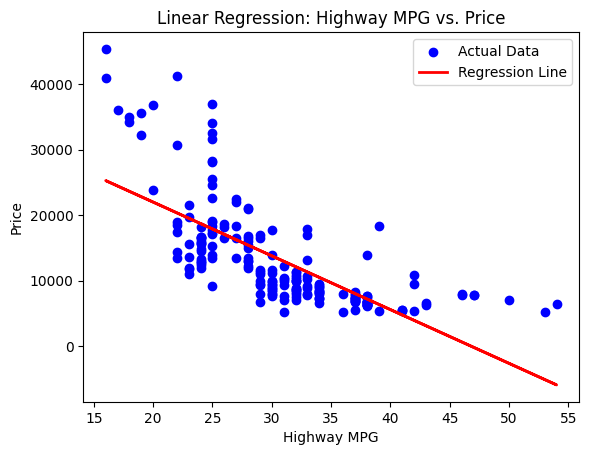

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of data points
plt.scatter(X, Y, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X, lm.predict(X), color='red', linewidth=2, label='Regression Line')

# Add labels and a title
plt.xlabel('Highway MPG')
plt.ylabel('Price')
plt.title('Linear Regression: Highway MPG vs. Price')
plt.legend()

# Show the plot
plt.show()


In [30]:
# Train the model using "engine-size" as the independent variable and "price" as the dependent variable
W = df[['engine-size']]
Z = df['price']

In [31]:
# train the model
lm.fit(W,Y)

LinearRegression()

In [32]:
predict1 =lm.predict(W)
predict1[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [33]:
lm.intercept_

np.float64(-7963.338906281042)

In [34]:
# slope value
lm.coef_

array([166.86001569])

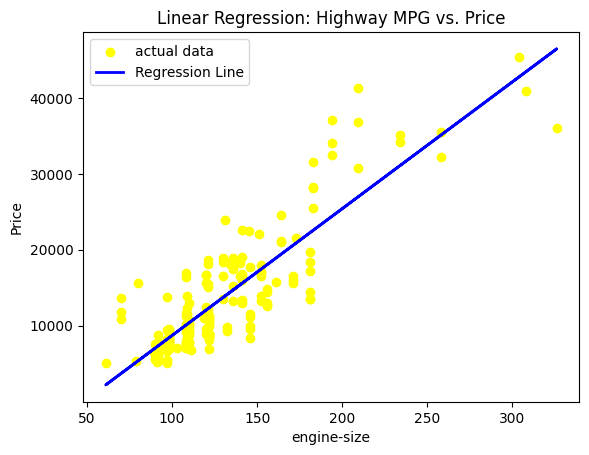

In [35]:
# Scatter plot of data point
plt.scatter(W, Z, color='Yellow', label ='actual data' )
#plot the regression line
plt.plot(W,lm.predict(W), color = 'blue',linewidth=2, label='Regression Line')

# Add labels and a title
plt.xlabel('engine-size')
plt.ylabel('Price')
plt.title('Linear Regression: Highway MPG vs. Price')
plt.legend()

# Show the plot
plt.show()

In [54]:
# The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616. You can verify it using the following command:

df[["engine-size","highway-mpg","price"]].corr()

,engine-size,highway-mpg,price
engine-size,1.000000,-0.679571,0.872335
highway-mpg,-0.679571,1.000000,-0.704692
price,0.872335,-0.704692,1.000000


<b>Conslusion</b>
<br>
<p>A positive slope in the regression line suggests that the predictor variable (engine size) and the response variable (price) increase together. The regression line reflects this trend, showing that vehicles with larger engine sizes are generally more expensive.So, This is a positive linear regression, as the regression line slopes upward from left to right</p>

<h1>Multiple Linear Regression<h1>

The multiple linear regresssion model is a machine learning technique used to explain relationship between one continious variables and two or more predictor (independent) variable. 
$$
Y: Response \ Variable\\\\\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$

$$
a: intercept\\\\\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$

The equation is given by: 
$$Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

In [36]:
# define the training variables
U = df[["horsepower","curb-weight","engine-size", "highway-mpg"]]

In [37]:
#FIT the model
lm.fit(U, df["price"])

LinearRegression()

In [46]:
predict2 =lm.predict(U)
predict2[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [42]:
# intercept value
lm.intercept_

np.float64(-15806.624626329209)

In [43]:
#slope
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

/tmp/ipykernel_64511/3197896068.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
/tmp/ipykernel_64511/3197896068.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predict2, hist=False, color="b", label="Fitted

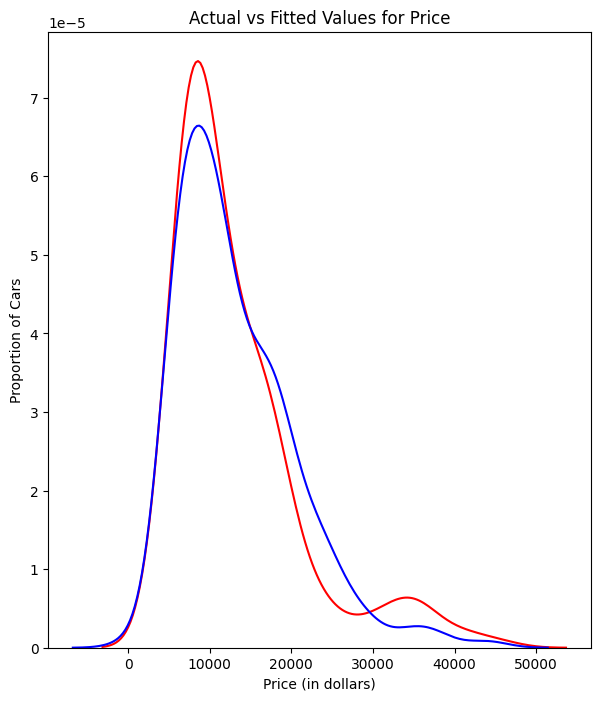

In [62]:
plt.figure(figsize=(7, 8))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(predict2, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

What is the linear function we get in this example?

<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>

positive slope in the regression line suggests that the predictor variables and the response variable (price) increase together.

<h2>Model Evaluation Using Visualization</h2>

**Residual Plot**

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

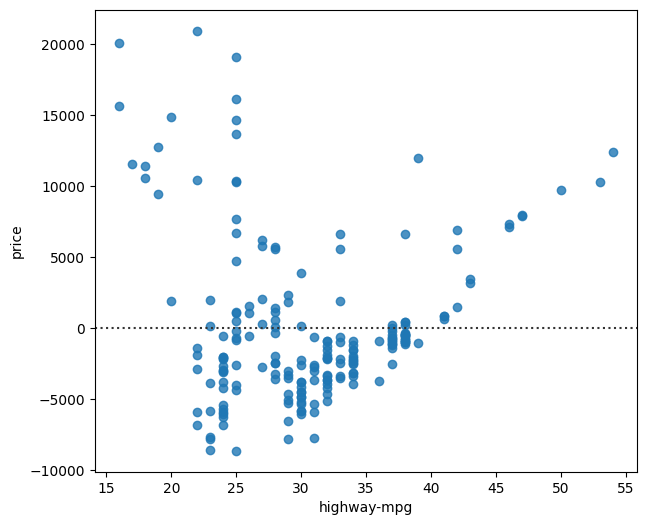

In [57]:
width = 7
height = 6
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

<h2>Polynomial Regression and Pipeline</h2>

In [67]:
def PlotPolly(model, idenpendent_variable, dependent_variable, name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(idenpendent_variable, dependent_variable, '.', x_new, y_new,'-')
    plt.title("Polynomial Fit with matplotlib for Price")
    ax = plt.gca
    # ax.set_facecolor(0.898, 0.898,0.898)
    fig = plt.gcf()
    plt.xlabel(name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [68]:
x = df['highway-mpg']
y = df['price']

In [77]:
# Lert's fit the polynomial using polyfit then use poly1d to display
# Here is a polynomial of the 3rd order

f =np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


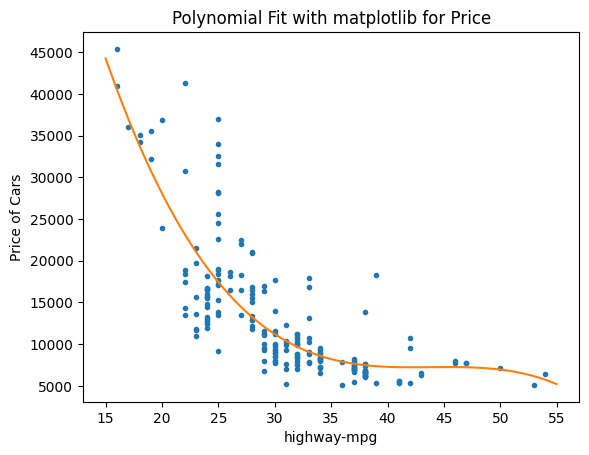

In [70]:
PlotPolly(p, x, y, 'highway-mpg')

In [73]:
help(np.polyfit)

Help on _ArrayFunctionDispatcher in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y 

In [78]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>

In [79]:
# Create 11 order polynomial model with the variables x and y from above.
f =np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


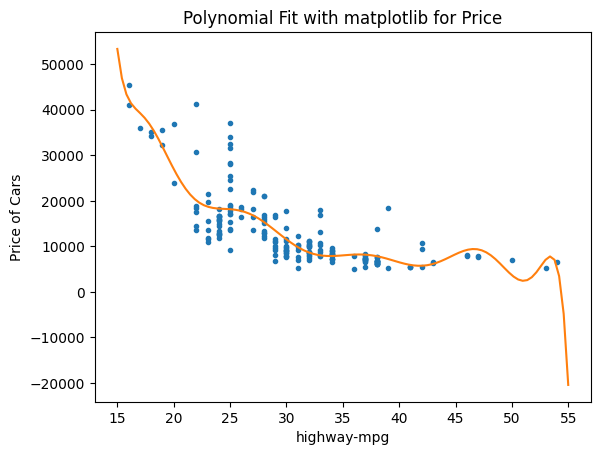

In [80]:
PlotPolly(p, x, y, 'highway-mpg')

In [81]:
# polynomial transform on multiple features
from sklearn.preprocessing import PolynomialFeatures

In [82]:
# Create polynomial feature object of degree 2
pr = PolynomialFeatures()
pr

PolynomialFeatures()

In [84]:
z_pr = pr.fit_transform(U)

In [86]:
# Original Data
U.shape

(201, 4)

In [87]:
# After tranformation
z_pr.shape

(201, 15)

<h3> Pipeline</h3>

Data Pipeline simplify the steps of processing the data.

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [89]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [90]:
pipe =Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [91]:
# First, we convert the data type Z to type float to avoid conversion warnings that may appear 
# as a result of StandardScaler taking float input

Z = U.astype(float)
pipe.fit(U,y) # fit data

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [92]:
# Normalize data , perform a transformation and predict
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<h2>4. Measure for In-Sample Evaluation</h2>

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

- R^2 / R-squared
- Mean Squared Error (MSE)

<b>R-squared</b>

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

<b>Mean Squared Error (MSE)</b>

The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ)

<h4>Model 1. Simple Linear Regression</h4>

In [93]:
# highway-mpg fit
lm.fit(X,Y)
#Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


We can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

In [94]:
# MSE calculate
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [95]:
from sklearn.metrics import mean_squared_error